In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

# מבוא לסיבוכיות

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/HPIkxZCgGZA?si=M534uKSxEbBgkOj_" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

בסרטון זה למדנו על שני סוגים של יעילות של הקוד שלנו - כמה זמן הוא לוקח, וכמה זכרון הוא צריך במחשב.

In [3]:
import json
from jupyterquiz import display_quiz

quiz2 = '''
[
  {
    "type": "many_choice",
    "question": "ברוב המקרים, אילו מהמשאבים הללו חשוב יותר?",
    "answers": [
      {
        "answer": "מקום",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "זמן",
        "correct": true,
        "feedback": "נכון! ומאחר שזמן הוא משאב כה חשוב, מעניין אותנו למדוד כמה פעולות מבצע אלגוריתם מסוים."
      }
    ]
  }
]
'''
display_quiz(json.loads(quiz2))


<IPython.core.display.Javascript object>

### חישוב כמות הפעולות באלגוריתם

לאלגוריתמים השונים שראינו עד כה היה מספר שונה של פקודות, ראינו גם שישנן פקודות שחוזרות על עצמן מספר פעמים.  
כמות הפעמים שנבצע כל פקודה - או מספר הצעדים - ישפיע מאוד על **יעילות** האלגוריתם.  
בסרטון הבא נבין כיצד למדוד את כמות הפעולות באלגוריתם.

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/fT9NZSQ0pt8?si=X6Namz9Fj-QQyYs-" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


הסתכלו על הלולאה המקוננת הבאה:

```python
n = 10
for i in range(n):
    for j in range(n):
        print(i, j)
```
ולולאה זו מבצעת 10X10 = 100 איטרציות בסה"כ.

כמה איטרציות היא תבצע אם נגדיל את n פי 2, מ-10 ל-20?

In [5]:
import json
from jupyterquiz import display_quiz

quiz = '''
[
  {
    "question": "כמה איטרציות תודפסנה אם נגדיל את n מ-10 ל-20?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 400,
        "correct": true,
        "feedback": "נכון!"
        }
    ]
  }
]
'''
display_quiz(json.loads(quiz))


<IPython.core.display.Javascript object>

### סיבוכיות ומדידת זמנים

נשווה את זמני הריצה של מספר פונקציות שונות כדי לקבוע איזו פונקציה הכי מהירה.

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/HUqsZ1xvNI0?si=GgC6uhhW6xXzDm1l" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [7]:
import time

def f1(n):
    s = 0
    for i in range(n):
        s = s + i
    return s

def f2(n):
    s = 0
    for i in range(n):
        for j in range(n):
            s = s + (i + j)
    return s


start = time.perf_counter()
f2(1000)
end = time.perf_counter()
print(f"n = 1000, measured time: {end-start:.2f}")

start = time.perf_counter()
f2(2000)
end = time.perf_counter()
print(f"n = 2000, measured time: {end-start:.2f}")

start = time.perf_counter()
f2(4000)
end = time.perf_counter()
print(f"n = 4000, measured time: {end-start:.2f}")

n = 1000, measured time: 0.04
n = 2000, measured time: 0.19


n = 4000, measured time: 0.84


#### סיכום מדידת זמנים


בסרטון לעיל הצגנו 2 מחלקות סיבוכיות זמן:
1. סיבוכיות זמן לינארית - בתוכניות ממחלקה זו הכפלת גודל הקלט בגורם מסוים תגרום
להכפלה באותו הגורם של זמן הריצה, למשל – קלט גדול פי 3 יגרום לזמן ריצה גדול פי 3 בערך.
פונקציה לדוגמה ממחלקה זו - הפונקציה `f1` בה השתמשנו בלולאת for יחידה בעלת n איטרציות:
```python
def f1(n):
 s = 0
 for i in range(n):
 s = s + i
 return s
```
2. סיבוכיות זמן ריבועית - בתוכניות ממחלקה זו הכפלת גודל הקלט בגורם מסוים תגרום
להכפלה של זמן הריצה באותו גורם בריבוע, למשל – קלט גדול פי 3 יגרום לזמן ריצה גדול
פי 9 בערך. פונקציה לדוגמה ממחלקה זו - הפונקציה `f2` שבה השתמשנו בלולאות for
מקוננות - לולאה פנימית ולולאה חיצונית, כל אחת מהן בעלת n איטרציות:
```python
def f2(n):
 s = 0
 for i in range(n):
 for j in range(n):
 s = s + (i + j)
 return s
```
הכרנו כלי מעשי - קוד המאפשר לנו למדוד זמני ריצה באמצעות הפונקציה `perf_counter` מהספריה `time`.
בקטע זה שומרים את זמן ההתחלה וזמן הסיום של קטע הקוד שאת זמן הריצה שלו מודדים, ומדפיסים את
ההפרש ביניהם:
```python
import time
start =  time.perf_counter() 
(Code to measure)
end =  time.perf_counter() 
print("measured time:", end-start)
```

#### בחנו את עצמכם

לפניכם מוצגות מספר פונקציות המקבלות כקלט מספר או שני מספרים שלמים. הפונקציות משתמשות בפונקציה הדמיונית `do_something` שזמן הריצה שלה הוא תמיד שניה אחת בדיוק.

עבור כל פונקציה כתבו מהו זמן הריצה שלה (בשניות), כתלות בגודל הקלט.

הבהרה: הניחו כי כל שאר הפעולות שהפונקציה מבצעת - כגון עדכון המשתנה בלולאה - לוקחות זמן זניח וניתן להתעלם מהן בחישוב זמן הריצה.

1. 
```python
def func1(n):
    do_something()    
    for i in range(n):
        do_something()
```

In [8]:
import json
from jupyterquiz import display_quiz

quiz = json.loads("""
[
    {
        "question": "כמה פעמים תבוצע הקריאה לפונקציה do_something בקוד הבא?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "n",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "n+1",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "n+2",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "n+3",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }
]
""")
display_quiz(quiz)


<IPython.core.display.Javascript object>

2.
```python
def func2(m,n):
    for i in range(m):
        do_something()
    for i in range(n):
        do_something()
```

In [9]:
import json
from jupyterquiz import display_quiz

quiz = json.loads("""
[
    {
        "question": "כמה פעמים תבוצע הקריאה לפונקציה do_something בקוד הבא?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "m",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "n",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "m+n",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "m*n",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }
]
""")
display_quiz(quiz)


<IPython.core.display.Javascript object>

3. 
```python
def func3(m,n):
    for i in range(m):
        for j in range(n):
            do_something()
```

In [10]:
import json
from jupyterquiz import display_quiz

quiz = json.loads("""
[
    {
        "question": "כמה פעמים תבוצע הקריאה לפונקציה do_something בקוד הבא?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "m",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "n",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "m+n",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "m*n",
                "correct": true,
                "feedback": "נכון!"
            }
        ]
    }
]
""")
display_quiz(quiz)


<IPython.core.display.Javascript object>

## דוגמא מסכמת: ניתוח סיבוכיות האלגוריתם למציאת הגורם הראשוני המינימלי

### בעית מציאת הגורם המינימלי

בסרטון הבא נלמד מהם מספרים ראשוניים, ונכיר את בעיית "מציאת הגורם המינימלי".

In [11]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/iDf3Fi3sTLg?si=lps1Mz5y4LWnWZ7h" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [12]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "type": "many_choice",
    "question": "מהו הקלט ומהו הפלט בבעיה שראינו זו עתה?",
    "answers": [
      {
        "answer": "קלט - כל הגורמים של המספר. פלט - מספר שלם חיובי",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "קלט - הגורם הקטן ביותר הגדול מ-1 של המספר. פלט - מספר שלם חיובי",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "קלט - מספר שלם חיובי. פלט - הגורם הקטן ביותר הגדול מ-1 של המספר",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "קלט - מספר שלם חיובי. פלט - כל הגורמים של המספר",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  },
  {
    "type": "many_choice",
    "question": "עבור איזה מהקלטים הבאים האלגוריתם יבצע איטרציה אחת בלבד ויסיים?",
    "answers": [
      {
        "answer": "15",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "10",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "11",
        "correct": false,
        "feedback": "לא נכון"

      },
      {
        "answer": "9",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

ממשו תוכנית למציאת הגורם הראשוני המינימלי של מספר שלם. הנה תזכורת לפסאודו-קוד של התוכנית שהוצג ביחידה על מספרים ראשוניים:

קלט: מספר שלם חיובי `n`

1. לכל `k` בין 2 לבין `n`:  
    1.1. אם `n` מתחלק ב-`k` ללא שארית:  
        1.1.1. החזר את `k` וסיים (`k` הוא הגורם הקטן ביותר של `n`)  

היעזרו באופרטורים שלמדתם עבור מספרים.

In [13]:

def smallest_factor(n):
    # delete pass and fill in your code below
    pass


### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Checking the smallest factor of 24")
ans = smallest_factor(24)
if ans == 2:
    print("CORRECT: 2 is the smallest factor of 24")
else:
    print("WRONG: 2 is the smallest factor of 24 but the code returned", ans)

print("********************")
print("Checking the smallest factor of 33")
ans = smallest_factor(33)
if ans == 3:
    print("CORRECT: 3 is the smallest factor of 33")
else:
    print("WRONG: 3 is the smallest factor of 33 but the code returned", ans)

print("********************")
print("Checking the smallest factor of 17")
ans = smallest_factor(17)
if ans == 17:
    print("CORRECT: 17 is the smallest factor of 17")
else:
    print("WRONG: 17 is the smallest factor of 17 but the code returned", ans)

print("********************")
print("Checking the smallest factor of 3476957")
ans = smallest_factor(3476957)
if ans == 11:
    print("CORRECT: 11 is the smallest factor of 3476957")
else:
    print("WRONG: 11 is the smallest factor of 3476957 but the code returned", ans)
    
print("********************")
print("Tests concluded, add more tests of your own below!")
print("********************")


********************
Starting the test:
********************
Checking the smallest factor of 24
WRONG: 2 is the smallest factor of 24 but the code returned None
********************
Checking the smallest factor of 33
WRONG: 3 is the smallest factor of 33 but the code returned None
********************
Checking the smallest factor of 17
WRONG: 17 is the smallest factor of 17 but the code returned None
********************
Checking the smallest factor of 3476957
WRONG: 11 is the smallest factor of 3476957 but the code returned None
********************
Tests concluded, add more tests of your own below!
********************


### יעילות האלגוריתם למציאת הגורם הראשוני המינימלי

נחזור לשאלת היעילות של האלגוריתם למציאת הגורם הראשוני המינימלי של מספר שלם. נתחיל בהערכת מספר האיטרציות הדרושות לאלגוריתם שראינו כדי למצוא גורם ראשוני מינימלי.

**פסאודו קוד: מציאת הגורם המינימלי**  
קלט: מספר שלם חיובי `n`

1. לכל `k` בין 2 לבין `n`:  
    1.1 אם `n` מתחלק ב- `k` ללא שארית:  
        1.1.1 החזר את `k` וסיים  
(`k` הוא הגורם הקטן ביותר של `n`)

**מהו מספר האיטרציות המקסימלי האפשרי של האלגוריתם שבנינו למציאת הגורם הראשוני הקטן ביותר של מספר נתון?**

עבור מספר נתון `n` שאת ראשוניותו רוצים לבדוק, מספר האיטרציות הוא כמספר הערכים `k` בין 2 לבין `n`, כלומר `n-1` איטרציות. כמובן, אם גילינו בשלב מוקדם יותר ש-`n` מתחלק ללא שארית בערך כלשהו של `k`, מספר האיטרציות בפועל יהיה קטן יותר.

אפשר ליעל את האלגוריתם שלנו ולעצור את ריצתו אחרי הרבה פחות מ-n-1 איטרציות. למעשה, $\sqrt(n)$ איטרציות (קרי: שורש ריבועי של `n`) מספיקות. 

איך ייתכן שאפשר לוותר על כל כך הרבה שלבי בדיקה מבלי להסתכן שנפספס את הגורם המינימלי?

הסתכלו למשל על המספר 100. שורש ריבועי של 100 זה המספר שכשנעלה אותו בריבוע נקבל 100, כלומר 10. יש שמונה מספרים בין 2 ל-100 (לא כולל) שמחלקים את 100. נרשום את כולם:

2, 4, 5, 10, 20, 25, 50

עכשיו, שימו לב לעובדה הבאה: ניתן להפריד את המחלקים של 100 לזוגות: לכל מחלק של 100 שגדול או שווה ל-10 אפשר להצמיד את אחד מהמחלקים שקטן או שווה 10, כך שמכפלת השניים תהיה שווה 100 

| תוצר הכפלה | מחלק קטן או שווה ל-10 | מחלק גדול או שווה ל-10 |
|------------|------------------------|--------------------------|
|            | 2                      | 50                       |
|            | 4                      | 25                       |
|            | 5                      | 20                       |
| 100        | 10                     | 10                       |

מה כל זה אומר? זה אומר שלא יכול להיות שכל המחלקים של 100 גדולים משורשו הריבועי. חייב להיות גורם ראשוני של מאה שקטן או שווה לשורשו הריבועי. כי לכל אחד מהמחלקים של 100 שגדולים משורשו הריבועי יש "בן זוג" שקטן משורשו הריבועי. הדבר נכון לא רק למספר 100, אלא לכל מספר שלם חיובי! 

המסקנה היא שאם האלגוריתם שלנו ביצע לפחות $\sqrt(n)$ איטרציות ולא החזיר מחלק, k, אפשר לעצור ולהחזיר n. להריץ $\sqrt(n)$ איטרציות זה הרבה פחות מלהריץ n-1 איטרציות!
שימו לב כי ישנם מקרים בהם n−−√ איטרציות הן באמת מספר האיטרציות המינימלי הדרוש למציאת מחלק. למשל, עבור n=25, המחלק הקטן ביותר של 25 הוא 5, שהוא שורשו הריבועי. האם אתם יכולים לחשוב על ערכי n אחרים עבורם נצטרך $\sqrt(n)$ איטרציות? מה משותף להם?

הסתכלו על האיור הבא:  
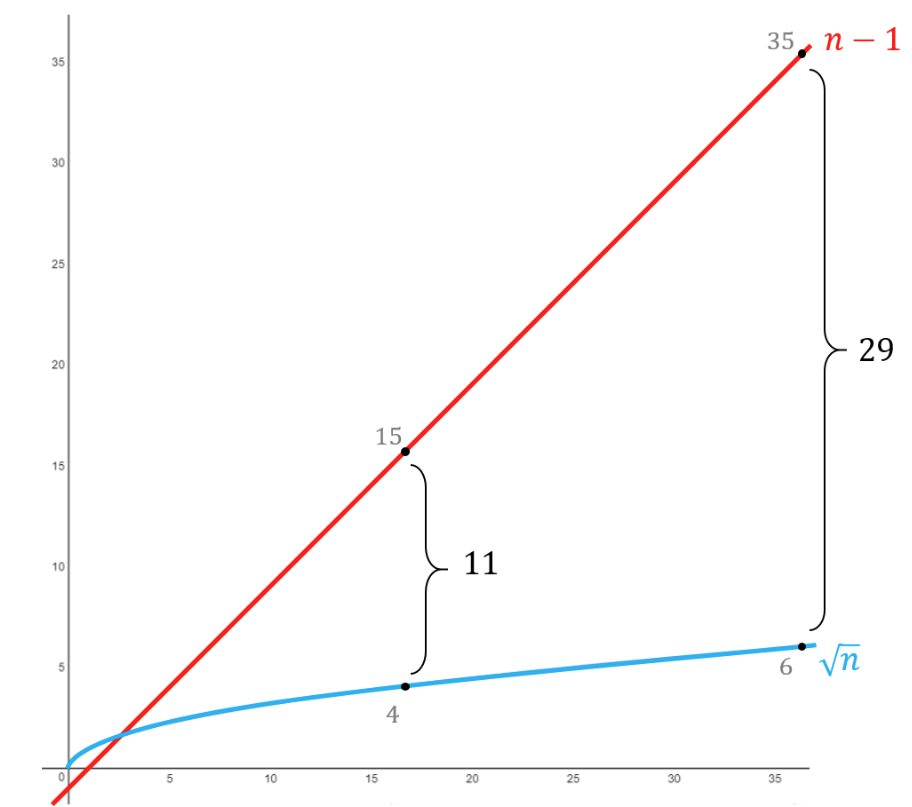

הקו האדום מייצג את הערך של הביטוי n−1 עבור ערכים שונים של n. למשל, עבור n = 16, הערך של ביטוי זה, הוא 15. הקו הכחול מייצג את הביטוי $\sqrt(n)$, ועבור n=16, ערך הביטוי הוא 4. ההפרש בין שני ערכים אלו הוא 11. לעומת זאת, עבור n=36, למשל, ההפרש גדל עוד יותר, והוא עומד על 29. ההבדל נעשה דרמטי יותר ככל ש-n הוא מספר גדול יותר. חישבו למשל על הערכים שהיו מתקבלים עבור n=10**6. **איור זה ממחיש שהעובדה שהצלחנו לצמצם את מספר האיטרציות מ-n−1 ל-$\sqrt(n)$ היא שיפור משמעותי ביעילות האלגוריתם.** 

לעומת זאת, עבור מספרים גדולים שמכילים כמה מאות ספרות עשרוניות, לאלגוריתם שלנו ידרש זמן רב מדיי להשלמתו (וגם לאלגוריתם המשופר שתחת החדשות הטובות). הכוונה היא לא לחמש דקות או שעתיים, אלא לסדר גודל של מליארדי שנים! יש אמנם אלגוריתמים אחרים, מסובכים, מתוחכמים, יעילים יותר, למציאת גורמים של מספר. אבל גם אלה אינם יכולים למצוא ביעילות גורמים של מספרים גדולים.

## סיכום

<span style="color: red;">TODO: סיכום טוב אבל "סיימתם את שיעור שלוש" ובסוף הוא טוען שכמעט סיימנו את החלק התכנותי.
לדעתי צריך לתמלל את ההתחלה של זה או לחתוך היטב</span>

לחתוך 0:07-0:18  
לחתוך 1:34 -1:44

In [14]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TF2QOabrPSI?si=x-Naas4iTRvKoX7Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>